# Drone_Cat_Mouse Practice

<img src="images/jderobot.png" width="15%" height="15%" style="float:left;padding-right:15px"/>

## 1- Introduction
---

In this exercise we are going to implement a "Formula 1" intelligence to follow a red line across the circuit. To do it, the student needs to have at least the next knowledge:
* Python programming skills
* Color spaces (RGB, HSV, etc)
* Basic understanding of [OpenCV library](http://opencv.org/)

## 2- Exercise components

<img src="images/drones.png" width="30%" height="30%" style="float:right;padding-right:15px"/>
### 2.1- Gazebo simulator
---
Gazebo simulator will be running in the background. The Gazebo world employed for this exercise has one element: a simulated Formula1 car robot.The Formula1 robot will provide camera where the images will be provided to the student and a laser where the walls will be detected. 

### 2.2 Cat Component
This component has been developed specifically to carry out this exercise. This component connects to Gazebo to teleoperate the drone (or send orders to it) and receives images from its camera. The student has to modify this component and add code to accomplish the exercise. In particular, it is required to modify the execute() method.

### 2.3 Mouse Component
To run the mouse drone, you must download the mice folder:
 - cd /homme/XXXXX/Jupyter/drone_cat_mouse
 - mkdir mice
 - wget http://jderobot.org/store/jmplaza/uploads/jderobot-academy/drone-catmouse/mice.tgz
 - tar -zxvf mice.tgz
 
Where "XXXXXX" it's your user. So, in the mouse instruction, you have to change "pablo" name for your user name.

### 2.4 Referee Component
Also, you can run a referee to check the distance betwen your drone and the mouse_drone. The referee it's used to improve your algorithm.

## 3- Exercise initialization
---
First of all, we need to run the Gazebo simulator:

In [1]:
import subprocess
gazebo = subprocess.Popen(("gazebo", "ardrone-trees-simple.world"))

After launch the gazebo simulator, we must wait a few second to let the gazebo's world be opened. Then a world like the one shows in the following picture should appears:

<img src="images/world.png" width="50%" height="50%">

Before start the algorithm, we must launch de mouse drone:

In [ ]:
mouse = subprocess.Popen(("q1_mouse", "q1.cfg"), cwd="/home/pablo/Jupyter/drone_cat_mouse/mice")

In [2]:
import sys
import matplotlib

referee = subprocess.Popen("/home/pablo/Jupyter/drone_cat_mouse/referee/referee.py /home/pablo/Jupyter/drone_cat_mouse/referee/referee.yml", shell=True)


Also, you can run the referee:

loading Config file /home/pablo/Jupyter/drone_cat_mouse/referee/referee.yml
Pose3D -t -e 1.1:tcp -h localhost -p 9000 -t 60000
Pose3D -t -e 1.1:tcp -h localhost -p 9900 -t 60000


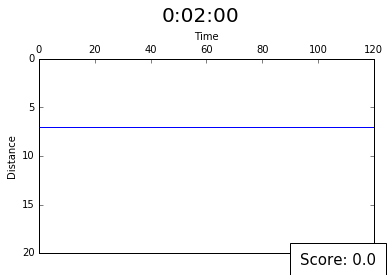

In [3]:
%matplotlib inline

import matplotlib

%gui qt
%run /home/pablo/Jupyter/drone_cat_mouse/referee/referee.py /home/pablo/Jupyter/drone_cat_mouse/referee/referee.yml

Then we import the necessary files:

In [ ]:
#!/usr/bin/python
#-*- coding: utf-8 -*-
import threading
import time
import math
import cv2
import numpy as np
from datetime import datetime

from cat import Cat
from printer import printImage

time_cycle = 80

To start coding, we need to call ``Cat`` class once. Run this code and wait a few seconds until follow line initialization finishes with an ``OK`` message:

In [ ]:
%matplotlib inline

ct = Cat()
ct.play()

Remember to send the takeoff order to the drone, so you can see anything on its camera:

In [ ]:
ct.extra.takeoff()  #We will go over the drone's API in step 3.1

Now we can start coding to give intelligence to the Formula1 robot. We can do it modifying the execute() method from Cat component. This method will be called iteratively. Each iteration, we'll print a message.

In [ ]:
# Implement execute method
def execute(self):
    print "Running execute iteration"
      
ct.setExecute(execute)

Stop printing the updating of the method with an empty instruction:

In [ ]:
def execute(self):
    pass

ct.setExecute(execute)

### 3.1 - API
---
 - Te way to send orders to the robot is the following:
```
self.cmdvel.sendCMDVel(valueX,valueY,0,0,0,0)
```

- You can also get navigation data with:
```
data = self.navdata.getNavData() 
```
This will give you state (data.state), altitude (data.altd), vehicle (data.vehicle) and battery (data.batteryPercent).

- Get the image from the camera as:
```
img = self.getImage()
```
- Finally, you can use the drone's API, that allows you to:
```
self.pose.getPose3d().x, self.pose.getPose3d().y, self.pose.getPose3d().z
```
returns the position values of the drone in space.
```
self.pose.getPose3d().roll, self.pose.getPose3d().pitch, self.pose.getPose3d().yaw
```
returns the rotation values of the drone in space.
```
self.extra.takeOff()
```
Takeoff of the drone.
```
self.extra.land()
```
landing of the drone.

To save the images, you can use the following commands:

In [ ]:
def execute(self):
    img = self.getImage()
    self.set_color_image(img)
    
ct.setExecute(execute)

When you have the image saved, you can use these instructions to show the camera images:

In [ ]:
imageCamera = ct.get_color_image()
printImage(imageCamera)

Or you can use the following instructions to show the filtered images:

In [ ]:
def execute(self):
    img = self.getImage()
    self.set_threshold_image(img)
    
ct.setExecute(execute)

In [ ]:
segmentedImage = ct.get_threshold_image()
printImage(segmentedImage)